# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#print(cities)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

units = 'imperial'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# build the base query url
queryURL = f"{url}appid={weather_api_key}&units={units}&q="

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        time.sleep(10)
        
    # Create endpoint URL with each city  
    city_url = requests.get(queryURL + city)
    
     # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
     # Add 1 to the record count
    record_count += 1

    try:
        
        # Run an API request for each of the cities
        # Parse the JSON and retrieve data
        city_weather = city_url.json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        cityN = city_weather['name'] 
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] 
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
       
        # Append the City information into city_data list
        city_data.append({"City": cityN, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        
        pass
      
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")        
               

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rohru
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | pevek
Processing Record 4 of Set 1 | vilyuysk
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | margate
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | songkhla
Processing Record 11 of Set 1 | soyo
Processing Record 12 of Set 1 | north bend
Processing Record 13 of Set 1 | san nicolas
Processing Record 14 of Set 1 | vila franca do campo
Processing Record 15 of Set 1 | durango
Processing Record 16 of Set 1 | kenora
Processing Record 17 of Set 1 | iralaya
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | la romana
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | victoria
Processing R

Processing Record 37 of Set 4 | mezen
Processing Record 38 of Set 4 | mar del plata
Processing Record 39 of Set 4 | urumqi
Processing Record 40 of Set 4 | saldanha
Processing Record 41 of Set 4 | aklavik
Processing Record 42 of Set 4 | enkhuizen
Processing Record 43 of Set 4 | sanford
Processing Record 44 of Set 4 | brae
Processing Record 45 of Set 4 | malabo
Processing Record 46 of Set 4 | viedma
Processing Record 47 of Set 4 | vardo
Processing Record 48 of Set 4 | nova olimpia
Processing Record 49 of Set 4 | prince rupert
Processing Record 0 of Set 5 | vila velha
Processing Record 1 of Set 5 | saleaula
City not found. Skipping...
Processing Record 2 of Set 5 | cabedelo
Processing Record 3 of Set 5 | salalah
Processing Record 4 of Set 5 | makakilo city
Processing Record 5 of Set 5 | komsomolskiy
Processing Record 6 of Set 5 | new norfolk
Processing Record 7 of Set 5 | saint-philippe
Processing Record 8 of Set 5 | carnarvon
Processing Record 9 of Set 5 | coquimbo
Processing Record 10 o

Processing Record 26 of Set 8 | kibala
Processing Record 27 of Set 8 | saint-junien
Processing Record 28 of Set 8 | hyeres
Processing Record 29 of Set 8 | zaysan
Processing Record 30 of Set 8 | kiunga
Processing Record 31 of Set 8 | micheweni
Processing Record 32 of Set 8 | wuwei
Processing Record 33 of Set 8 | pathein
Processing Record 34 of Set 8 | lasa
Processing Record 35 of Set 8 | grand baie
Processing Record 36 of Set 8 | kyabe
Processing Record 37 of Set 8 | manzhouli
Processing Record 38 of Set 8 | sur
Processing Record 39 of Set 8 | bafq
Processing Record 40 of Set 8 | tomatlan
Processing Record 41 of Set 8 | hasaki
Processing Record 42 of Set 8 | port hardy
Processing Record 43 of Set 8 | taoudenni
Processing Record 44 of Set 8 | kholmogory
Processing Record 45 of Set 8 | wonthaggi
Processing Record 46 of Set 8 | bissen
Processing Record 47 of Set 8 | camabatela
Processing Record 48 of Set 8 | fernie
Processing Record 49 of Set 8 | waldoboro
Processing Record 0 of Set 9 | pa

Processing Record 15 of Set 12 | kulhudhuffushi
Processing Record 16 of Set 12 | port hedland
Processing Record 17 of Set 12 | rupert
Processing Record 18 of Set 12 | nouadhibou
Processing Record 19 of Set 12 | rexburg
Processing Record 20 of Set 12 | devils lake
Processing Record 21 of Set 12 | concarneau
Processing Record 22 of Set 12 | nelson bay
Processing Record 23 of Set 12 | aloleng
Processing Record 24 of Set 12 | cumaribo
City not found. Skipping...
Processing Record 25 of Set 12 | nevers
Processing Record 26 of Set 12 | linchuan
City not found. Skipping...
Processing Record 27 of Set 12 | kesova gora
Processing Record 28 of Set 12 | erenhot
Processing Record 29 of Set 12 | vitim
Processing Record 30 of Set 12 | merrill
Processing Record 31 of Set 12 | poso
Processing Record 32 of Set 12 | samusu
City not found. Skipping...
Processing Record 33 of Set 12 | srandakan
Processing Record 34 of Set 12 | pyapon
Processing Record 35 of Set 12 | greenock
Processing Record 36 of Set 12

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns = ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rohru,31.2167,77.7500,45.55,38,2,5.28,IN,1678143546
1,Rikitea,-23.1203,-134.9692,80.51,77,100,22.64,PF,1678143546
2,Pevek,69.7008,170.3133,-27.65,94,26,2.30,RU,1678143547
3,Vilyuysk,63.7553,121.6247,-20.76,100,99,4.72,RU,1678143547
4,Jamestown,42.0970,-79.2353,40.59,78,100,10.36,US,1678143547


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Rohru,31.2167,77.7500,45.55,38,2,5.28,IN,1678143546
1,Rikitea,-23.1203,-134.9692,80.51,77,100,22.64,PF,1678143546
2,Pevek,69.7008,170.3133,-27.65,94,26,2.30,RU,1678143547
3,Vilyuysk,63.7553,121.6247,-20.76,100,99,4.72,RU,1678143547
4,Jamestown,42.0970,-79.2353,40.59,78,100,10.36,US,1678143547


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

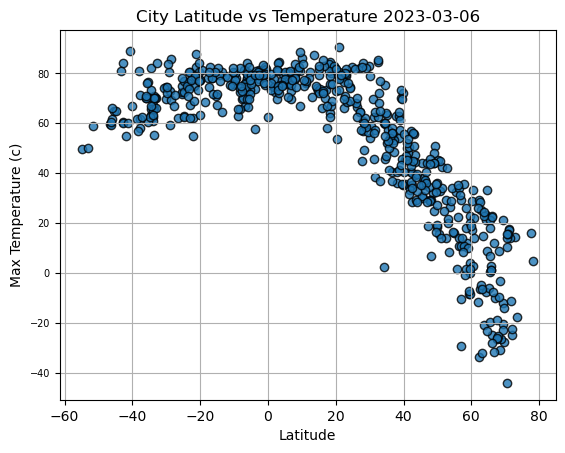

In [15]:
# Build scatter plot for latitude vs. temperature
today = date.today()

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha = 0.80, edgecolors = "k", marker="o")

# Incorporate the other graph properties    
plt.title(f"City Latitude vs Temperature {today}", fontsize = 12)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Max Temperature (c)', fontsize=10)
plt.yticks(fontsize = 7)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

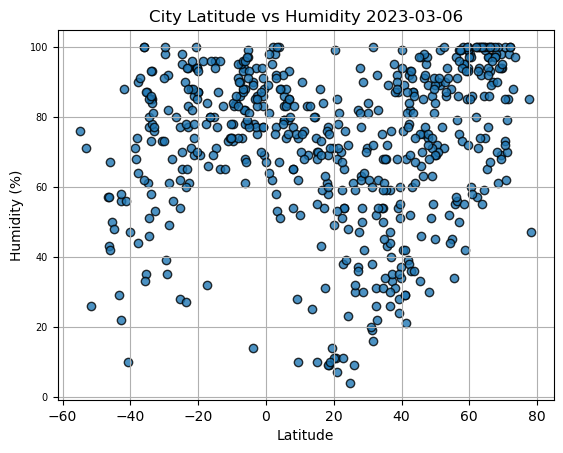

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha = 0.80, edgecolors = "k", marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity {today}", fontsize = 12)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Humidity (%)', fontsize=10)
plt.yticks(fontsize = 7)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

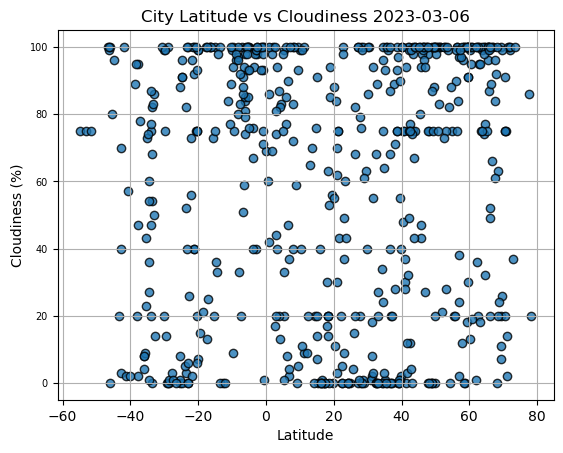

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],alpha = 0.80, edgecolors = "k", marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness {today}", fontsize = 12)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Cloudiness (%)', fontsize=10)
plt.yticks(fontsize = 7)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

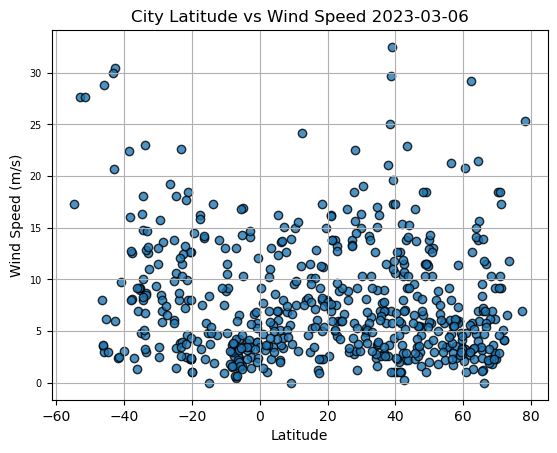

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha = 0.80, edgecolors = "black", marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed {today}", fontsize = 12)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Wind Speed (m/s)', fontsize=10)
plt.yticks(fontsize = 7)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:

# Define a function to create Linear Regression plots

from scipy import stats

# function takes 4 parameter
# x_value which is northern_hemi_df["Lat"]
# y_value which is northern_hemi_df["Max Temp"]
# xlabel is a string : example "Lat"
# ylabel is a stirng : ex: "Max Temp ..."

def linearR(x_values, y_values, xlabel, ylabel, hemisphere, title, coordinates) :
    
    # perform the linear regression
    (slope, intercept, rvalue, pvalue, sterr) = stats.linregress(x_values, y_values)
    
    # generate the data points for the regression line
    regressionValues = x_values * slope + intercept

    # line of best fit equation
    lineEQ = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # annotate the equation on to the graph
    plt.annotate(lineEQ, coordinates, color="red", fontsize=10)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    plt.title(f"{hemisphere} - {xlabel} vs. {ylabel} {today}", fontsize = 12)
       
    plt.scatter(x_values, y_values, alpha = 0.80, edgecolors = "black", marker="o")
 
    print(f"The r-value is: {rvalue**2}") 
    
    return plt.plot(x_values, regressionValues, "r-")


In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Rohru,31.2167,77.7500,45.55,38,2,5.28,IN,1678143546
2,Pevek,69.7008,170.3133,-27.65,94,26,2.30,RU,1678143547
3,Vilyuysk,63.7553,121.6247,-20.76,100,99,4.72,RU,1678143547
4,Jamestown,42.0970,-79.2353,40.59,78,100,10.36,US,1678143547
5,Margate,51.3813,1.3862,42.31,89,100,3.00,GB,1678143548


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Rikitea,-23.1203,-134.9692,80.51,77,100,22.64,PF,1678143546
6,Ushuaia,-54.8000,-68.3000,49.62,76,75,17.27,AR,1678143548
7,Punta Arenas,-53.1500,-70.9167,50.02,71,75,27.63,CL,1678143548
8,Atuona,-9.8000,-139.0333,80.15,78,9,11.45,PF,1678143548
10,Soyo,-6.1349,12.3689,77.68,82,81,6.58,AO,1678143549


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7892766362899377


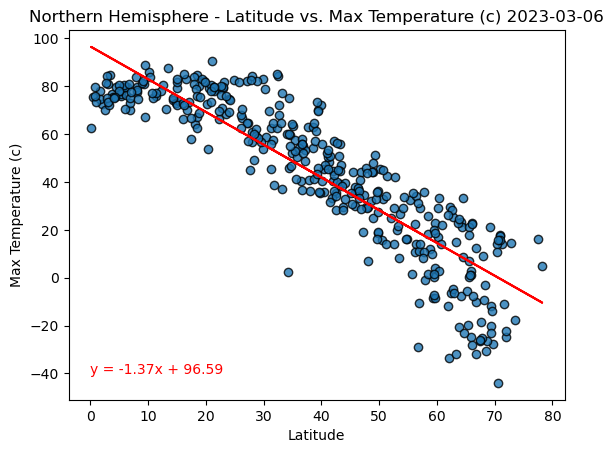

In [22]:
# Linear regression on Northern Hemisphere

# setup variables needed to call function linearR.
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

# Save the figure
plt.savefig("../output_data/Fig5.png")

# call function
linearR(x,y,"Latitude", "Max Temperature (c)", "Northern Hemisphere", "Latitude vs. Temperature", (0, -40))

The r-value is: 0.28261113916715436


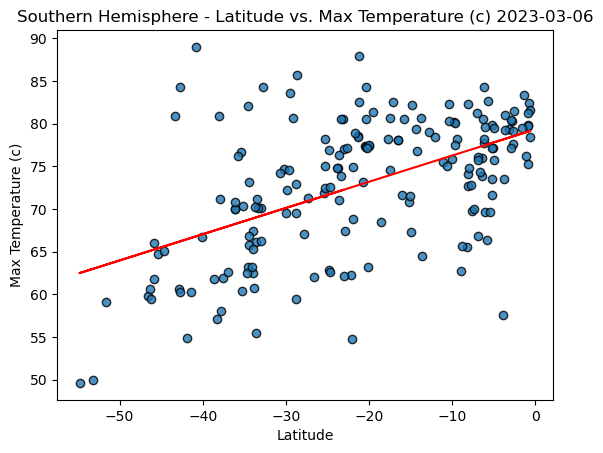

In [23]:
# Linear regression on Southern Hemisphere

# setup variables needed to call function linearR.
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

# Save the figure
plt.savefig("../output_data/Fig6.png")

# call function
linearR(x,y,"Latitude", "Max Temperature (c)","Southern Hemisphere", "Latitude vs. Temperature", (-50,40))


This section shows the plot of linear regression, showing the relationsip between the latitudes and max temperatures. There is a strong negative correlation between the latitudes and the temperatures in the northern hemisphere, which means that as we travel far and far up north, the temperature decrease. However, there is a very weak positive correlation between the latitudes and the temperatures in the southern hemisphere. The r value in the linear equation for the southern hemisphere is only around 0.2. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08760449674314512


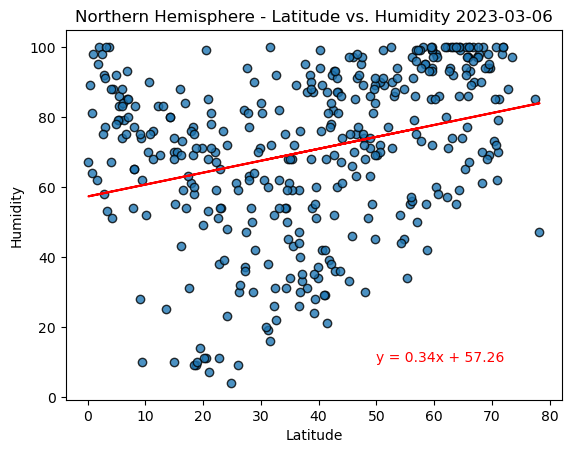

In [24]:
# setup variables needed to call function linearR.
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

# Save the figure
plt.savefig("../output_data/Fig7.png")

# call function
linearR(x,y,"Latitude", "Humidity", "Northern Hemisphere", "Latitude vs. Humidity", (50, 10))

The r-value is: 0.17345254566039447


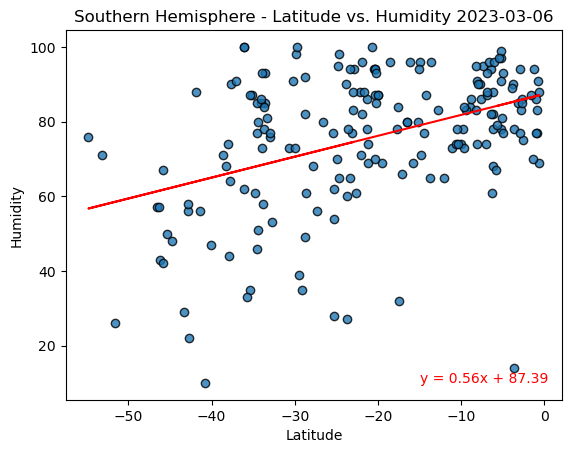

In [25]:
# Linear regression on Southern Hemisphere
# setup variables needed to call function linearR.
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

# Save the figure
plt.savefig("../output_data/Fig8.png")

# call function
linearR(x,y,"Latitude", "Humidity", "Southern Hemisphere", "Latitude vs. Humidity", (-15, 10))

This section shows the plot of linear regression, showing the relationsip between the latitudes and the humidity. For both northern hemisphere and southern hemisphere, there is a weak positive correlatin between the latitudes and the humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05315216799331545


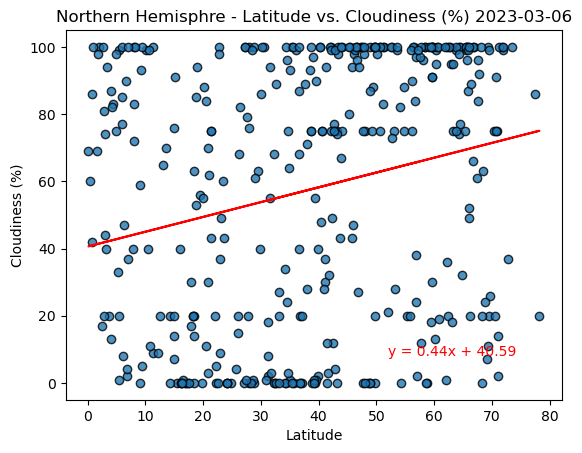

In [26]:
# setup variables needed to call function linearR.
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

# Save the figure
plt.savefig("../output_data/Fig9.png")

# call function
linearR(x,y,"Latitude", "Cloudiness (%)", "Northern Hemisphre", "Latitude vs. Cloudiness", (52, 8))


The r-value is: 0.09698401920989815


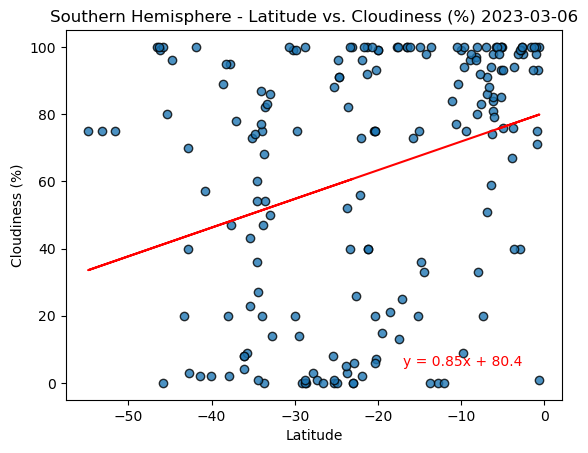

In [27]:
# Linear regression on Southern Hemisphere

# setup variables needed to call function linearR.
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

# Save the figure
plt.savefig("../output_data/Fig10.png")

# call function
linearR(x,y,"Latitude", "Cloudiness (%)", "Southern Hemisphere", "Latitude vs. Cloudiness", (-17, 5))


This section shows the plot of linear regression, showing the relationsip between the latitudes and the cloudiness in the northern hemisphere and the southern hemisphere. The r values for both northern hemispere is 0.053 and the southern hemispehre is 0.096. This means that there is no correlation between the latitudes and the cloudiness for both northern and southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0022543829600901824


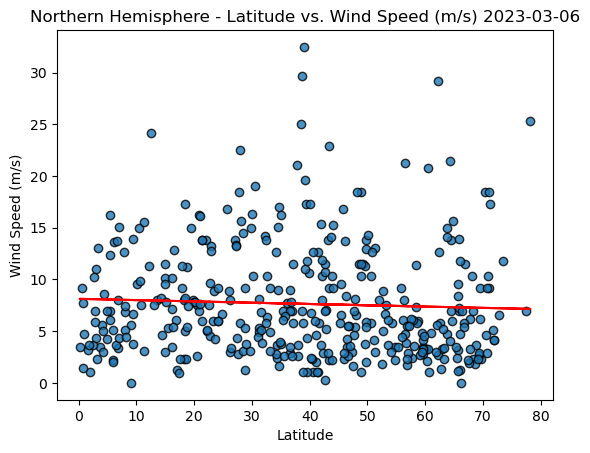

In [28]:
# setup variables needed to call function linearR.
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

# Save the figure
plt.savefig("../output_data/Fig11.png")

# call function
linearR(x,y,"Latitude", "Wind Speed (m/s)", "Northern Hemisphere", "Latitude vs. Wind Speed", (0, 40))


The r-value is: 0.15853751624371412


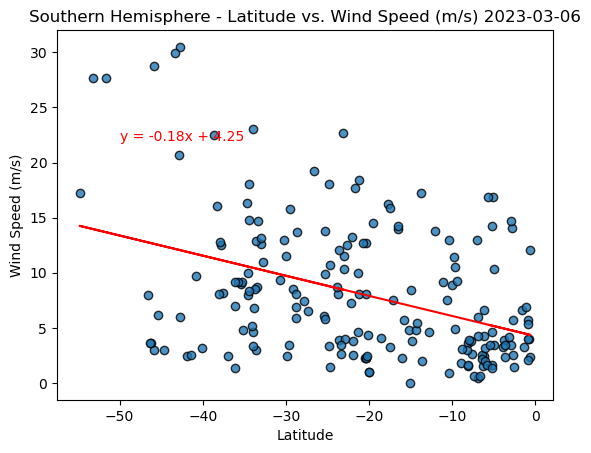

In [29]:
# Linear regression on Souhern Hemisphere

# setup variables needed to call function linearR.
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

# Save the figure
plt.savefig("../output_data/Fig11.png")

# call function
linearR(x,y,"Latitude", "Wind Speed (m/s)", "Southern Hemisphere", "Latitude vs. Wind Speed", (-50,22))


This section shows the linear regression plot showing the relation between the latitude and the wind speed for the northern hemisphere and the southern hemisphere. For the northern hemisphere, the r value shows that there is no correlation between the latitude and the wind speed. For the southern hemisphere, there is a very weak negative correlation between the latitudes and the wind speed. 

Prepared by Ratima Chowadee (2023)